# Create an input data set of $a_0$ and $\rho(z)$ for the vKdV model

In [13]:
import h5py
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
#from mpl_toolkits.axisartist.
from matplotlib.collections import LineCollection

from glob import glob

In [38]:
%matplotlib notebook

In [7]:
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.labelsize':'large'})

In [8]:
def double_tanh_6(beta, z):
    
    return beta[0,...] - beta[1,...]*(np.tanh((z+beta[2,...])/beta[3,...])
                + np.tanh((z+beta[2,...] + beta[4,...])/beta[5,...]))

In [9]:
def maximum_amplitude_finder(amp_signal):
    amp_min = np.min(amp_signal)
    amp_max = np.max(amp_signal)
    if np.abs(amp_min)>amp_max:
        return amp_min, np.argwhere(amp_signal==amp_min)[0][0]
    else:
        return amp_max, np.argwhere(amp_signal==amp_max)[0][0]

In [10]:
def load_density_h5(h5file):
    f = h5py.File(h5file,'r')
    rho = f['rho'][:]
    depth = f['depth'][:]
    data = f['beta_samples'][:]
    time = f['time'][:].astype('<M8[ns]')
    f.close()
    return data,time, rho, depth

def load_density_h5_stan(h5file):
    f = h5py.File(h5file,'r')
    data = f['data']['beta_samples'][:]
    time = f['data']['time'][:]
    f.close()
    return data,time

def load_density_xr(h5file, isstan=True):
    if isstan:
        data,time = load_density_h5_stan(h5file)

    else:
        data,time, rho, depth = load_density_h5(h5file)

    nparams, nt, ntrace = data.shape
    dims3 = ('params','time','ensemble')

    coords3 = {'time':time, 'ensemble':range(ntrace), 'params':range(nparams)}



    beta_da = xr.DataArray(data,
        coords=coords3,
        dims=dims3,
        attrs={'long_name':'', 'units':''},
        )

    return xr.Dataset({'beta':beta_da,})

In [11]:
!ls /home/suntans/cloudstor/Data/IMOS/*.h5

/home/suntans/cloudstor/Data/IMOS/2018-05-04_beta-samples-array.h5
/home/suntans/cloudstor/Data/IMOS/2018-05-22_beta-samples-array-all-data.h5
/home/suntans/cloudstor/Data/IMOS/Crux_KP150_12mth_Density_lowpass_beta-samples-array-all-data.h5
/home/suntans/cloudstor/Data/IMOS/Crux_KP150_12mth_Density_lowpass_density_bhm_4params_2018-12-18.h5
/home/suntans/cloudstor/Data/IMOS/Crux_KP150_12mth_Density_lowpass_density_bhm_6params_2018-12-13.h5
/home/suntans/cloudstor/Data/IMOS/Crux_KP150_12mth_Density_lowpass_density_bhm_6params_2018-12-16.h5
/home/suntans/cloudstor/Data/IMOS/Crux_KP150_12mth_Density_lowpass_density_bhm_6params_2018-12-18.h5
/home/suntans/cloudstor/Data/IMOS/Crux_KP150_12mth_Density_lowpass_density_bhm_6params_2018-12-19.h5
/home/suntans/cloudstor/Data/IMOS/Crux_KP150_12mth_Density_lowpass_density_bhm_7params_2018-12-13.h5
/home/suntans/cloudstor/Data/IMOS/Crux_KP150_12mth_Density_lowpass_density_bhm_7params_2018-12-16.h5
/home/suntans/cloudstor/Data/IMOS/Crux_KP150_AprMay2

In [29]:
###########
# Inputs
datadir = '/home/suntans/cloudstor/Data/IMOS/'
#datadir = '../../run_ddcurves/DATA_SHELL/'

# ddcurves BHM output file
nparams=6
#h5file = '%s/Crux_KP150_12mth_Density_lowpass_density_bhm_6params_2018-12-19.h5'%datadir
#h5file = '%s/Crux_KP150_Phs2_Density_lowpass_density_bhm_6params_2018-12-17.h5'%datadir
#h5file = '../../run_ddcurves/DATA_SHELL/Crux_KP150_Phs2_Density_lowpass_beta-samples-array-all-data.h5'

mode = 1

density_func = double_tanh_6

datadir = '/home/suntans/cloudstor/Data/IMOS/'
h5files = sorted(glob('%s/IMOS_Density_PIL200_20*_6params*.h5'%datadir) )

#outfile = '../data/vkdv_inputs_imospil200.csv'
outfile = '../data/vkdv_inputs_mode%d_imospil200.csv'%(mode+1)

#ncfile = '%sCrux_KP150_12mth_Density_lowpass_density_bhm_6params_2018-12-19_nliw.nc'%datadir
h5files

['/home/suntans/cloudstor/Data/IMOS/IMOS_Density_PIL200_2012_a_density_bhm_6params_2018-11-27.h5',
 '/home/suntans/cloudstor/Data/IMOS/IMOS_Density_PIL200_2012_b_density_bhm_6params_2018-11-27.h5',
 '/home/suntans/cloudstor/Data/IMOS/IMOS_Density_PIL200_2013_a_density_bhm_6params_2018-11-27.h5',
 '/home/suntans/cloudstor/Data/IMOS/IMOS_Density_PIL200_2013_b_density_bhm_6params_2018-11-26.h5',
 '/home/suntans/cloudstor/Data/IMOS/IMOS_Density_PIL200_2014_a_density_bhm_6params_2018-11-26.h5']

In [22]:
load_density_xr(h5file,isstan=False)

<xarray.Dataset>
Dimensions:   (ensemble: 500, params: 6, time: 735)
Coordinates:
  * time      (time) datetime64[ns] 2014-02-13T08:00:01 ... 2014-08-15T20:00:01
  * ensemble  (ensemble) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * params    (params) int64 0 1 2 3 4 5
Data variables:
    beta      (params, time, ensemble) float64 1.024e+03 1.024e+03 ... 64.71

In [23]:
#f = h5py.File(h5file,'r')
#for kk in f['data'].keys():
#    print(kk)
#print(f['depth'][:].min())
#f.close()
#load_density_h5_stan(h5file)

# Load a group of hdf5 files
ds = load_density_xr(h5files[0],isstan=False)
for h5file in h5files[1:]:
    ds = xr.concat([ds,load_density_xr(h5file,isstan=False)], dim='time')
ds

<xarray.Dataset>
Dimensions:   (ensemble: 500, params: 6, time: 3240)
Coordinates:
  * ensemble  (ensemble) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * params    (params) int64 0 1 2 3 4 5
  * time      (time) datetime64[ns] 2012-02-21T12:00:01 ... 2014-08-15T20:00:01
Data variables:
    beta      (params, time, ensemble) float64 1.023e+03 1.023e+03 ... 64.71

In [24]:
#ds = xr.open_dataset(ncfile)
#ds

<IPython.core.display.Javascript object>


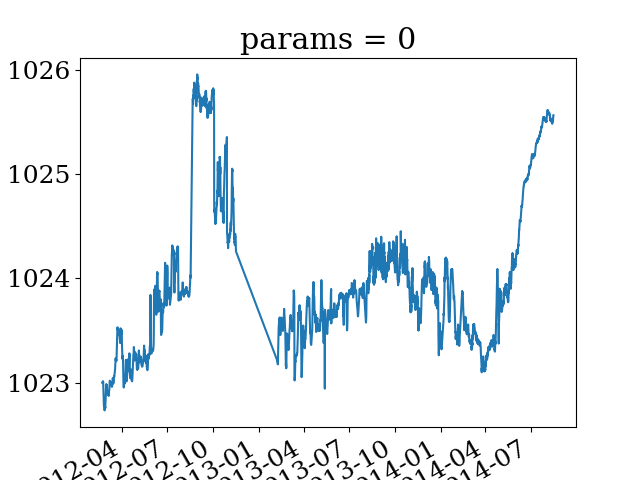

In [25]:
plt.figure()
ds.beta[0,:,:].median(axis=-1).plot()

<IPython.core.display.Javascript object>


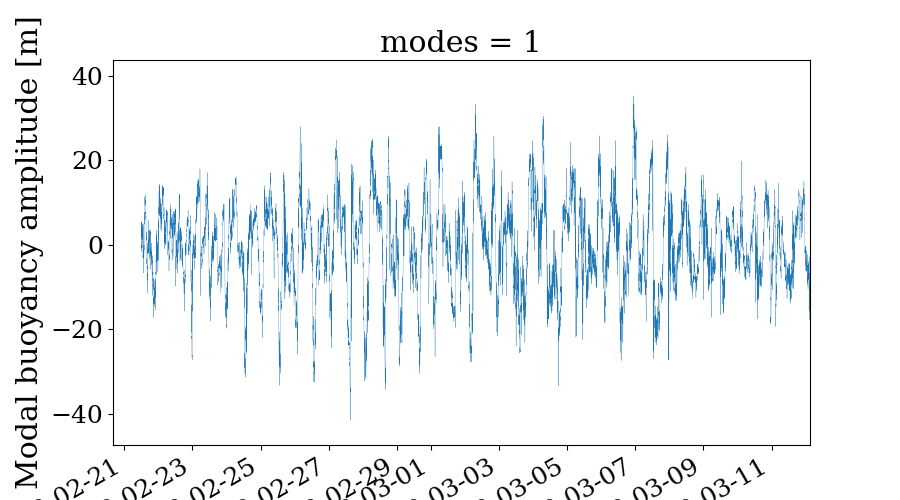

(-70, 70)

In [26]:
# Load the amplitude and density data

ncfile = '/home/suntans/Share/ARCHub/DATA/FIELD/IMOS/IMOS_Fitted_Buoyancy_Tonly.nc'

groups = ['PIL200_2012_a','PIL200_2012_b','PIL200_2013_a','PIL200_2013_b','PIL200_2014_a']
#groups = ['PIL100_2012_a','PIL100_2012_b',]


A_n = xr.open_dataset(ncfile,group=groups[0])['A_n'][:,mode]
for gg in groups[1:]:
    A_n = xr.concat([A_n, xr.open_dataset(ncfile,group=gg)['A_n'][:,mode]], dim='time')

plt.figure(figsize=(9,5))
A_n.plot(lw=0.2)
plt.ylim(-70,70)

In [27]:
# Get the unique days from the time series
dates = pd.DatetimeIndex(A_n["time"].values)#
time = dates.map(lambda t: t.date()).unique()
time


Index([2012-02-21, 2012-02-22, 2012-02-23, 2012-02-24, 2012-02-25, 2012-02-26,
       2012-02-27, 2012-02-28, 2012-02-29, 2012-03-01,
       ...
       2014-08-06, 2014-08-07, 2014-08-08, 2014-08-09, 2014-08-10, 2014-08-11,
       2014-08-12, 2014-08-13, 2014-08-14, 2014-08-15],
      dtype='object', length=814)

In [30]:
f=open(outfile,'w')
outstr = 'time, timemax, Amax, beta0, beta1, beta2, beta3, beta4, beta5'
print(outstr)
f.write(outstr+'\n')
for t1,t2 in zip(time[0:-1],time[1::]):
    A = A_n.sel(time=slice(t1,t2))
    
    # Find the amplitude
    Amax,idx = maximum_amplitude_finder(A.values)
    
    #plt.figure()
    #A.plot()
    #plt.plot(A.time.values[idx],Amax,'mo')
    
    # Find a representative (median) beta
    dsc=ds.sel(time=t2,method='nearest')
    meanbeta = dsc.beta.median(axis=-1).values
    #print('{}, {}, {}'.format(t1, A.time.values[idx], Amax, ))
    outstr = '%s, %s, %3.3f'%(t1, A.time.values[idx], Amax, )
    for bb in meanbeta:
        outstr +=', %3.3f'%bb

    print(outstr)
    f.write(outstr+'\n')
    #print('{}, {}, {}, {}, {}, {}, {}, {}, {}'.format(t1, A.time.values[idx], Amax, dsc.beta.mean(axis=-1).values) )
    
f.close()
print('Written to %s'%outfile)


time, timemax, Amax, beta0, beta1, beta2, beta3, beta4, beta5
2012-02-21, 2012-02-21T20:40:01.036800000, -17.313, 1022.996, 0.913, 61.733, 34.598, 87.576, 86.876
2012-02-22, 2012-02-22T23:49:01.036800000, -27.245, 1022.971, 0.939, 60.660, 42.204, 80.193, 87.800
2012-02-23, 2012-02-23T23:59:01.036800000, -19.788, 1022.813, 0.979, 54.613, 50.844, 70.520, 83.448
2012-02-24, 2012-02-24T13:13:01.036800000, -31.363, 1022.761, 1.000, 45.444, 47.401, 83.046, 70.631
2012-02-25, 2012-02-25T13:16:01.036800000, -33.250, 1022.748, 0.979, 42.169, 43.744, 87.138, 63.525
2012-02-26, 2012-02-26T13:56:01.036800000, -32.521, 1022.754, 0.987, 39.526, 45.237, 92.139, 67.778
2012-02-27, 2012-02-27T15:19:01.036800000, -41.472, 1022.887, 0.977, 50.629, 49.063, 89.825, 84.835
2012-02-28, 2012-02-28T15:54:01.036800000, -34.353, 1022.984, 0.982, 56.259, 47.683, 93.934, 91.878
2012-02-29, 2012-02-29T15:57:01.036800000, -30.445, 1022.978, 0.999, 50.847, 44.564, 105.643, 89.505
2012-03-01, 2012-03-01T06:00:01.03680

2012-05-14, 2012-05-14T17:36:01.036800000, -22.930, 1023.355, 0.688, 91.373, 33.115, 78.752, 36.705
2012-05-15, 2012-05-15T17:26:01.036800000, -25.650, 1023.296, 0.659, 93.491, 30.953, 69.982, 41.847
2012-05-16, 2012-05-16T09:02:01.036800000, 24.981, 1023.231, 0.629, 93.959, 27.015, 61.576, 39.993
2012-05-17, 2012-05-17T13:30:01.036800000, 25.253, 1023.261, 0.651, 96.229, 30.305, 64.972, 45.781
2012-05-18, 2012-05-18T22:45:01.036800000, 23.250, 1023.195, 0.607, 94.396, 28.036, 62.020, 37.260
2012-05-19, 2012-05-19T01:06:01.036800000, 22.643, 1023.181, 0.583, 94.169, 28.573, 64.402, 31.779
2012-05-20, 2012-05-20T11:36:01.036800000, 33.362, 1023.125, 0.540, 90.627, 26.593, 64.837, 25.336
2012-05-21, 2012-05-21T20:24:01.036800000, -20.074, 1023.127, 0.539, 90.690, 27.192, 66.644, 27.490
2012-05-22, 2012-05-22T11:14:01.036800000, 23.001, 1023.234, 0.589, 99.956, 33.270, 69.164, 34.902
2012-05-23, 2012-05-23T12:38:01.036800000, 19.038, 1023.236, 0.558, 102.578, 37.578, 65.981, 32.122
2012-0

2012-08-04, 2012-08-04T17:32:01.036800000, 34.626, 1023.848, 0.284, 124.381, 43.062, 53.073, 20.893
2012-08-05, 2012-08-05T03:00:01.036800000, 27.340, 1023.854, 0.286, 120.895, 42.357, 53.383, 19.046
2012-08-06, 2012-08-06T07:34:01.036800000, 56.557, 1023.900, 0.313, 120.057, 49.867, 56.272, 19.075
2012-08-07, 2012-08-07T08:00:01.036800000, 44.186, 1023.915, 0.327, 119.543, 53.860, 59.774, 21.597
2012-08-08, 2012-08-08T20:50:01.036800000, 54.163, 1023.890, 0.326, 114.447, 52.855, 64.399, 20.789
2012-08-09, 2012-08-09T23:05:01.036800000, 55.241, 1023.869, 0.333, 110.483, 59.286, 65.733, 22.204
2012-08-10, 2012-08-10T10:12:01.036800000, 42.440, 1023.861, 0.343, 104.443, 58.901, 71.529, 21.764
2012-08-11, 2012-08-11T00:26:01.036800000, 46.270, 1023.849, 0.335, 101.432, 58.657, 74.824, 25.200
2012-08-12, 2012-08-12T18:52:01.036800000, -33.054, 1023.831, 0.320, 98.656, 57.129, 80.056, 26.884
2012-08-13, 2012-08-13T08:14:01.036800000, -31.382, 1023.841, 0.333, 98.055, 54.197, 82.438, 22.813


2012-10-28, 2012-10-28T03:59:00.979200000, 29.858, 1024.433, 1.428, 39.144, 152.375, 183.612, 46.450
2012-10-29, 2012-10-29T00:28:00.979200000, 23.640, 1024.342, 1.428, 35.889, 130.357, 183.615, 41.058
2012-10-30, 2012-10-30T02:44:00.979200000, 24.074, 1024.290, 1.428, 36.238, 118.509, 183.614, 42.753
2012-10-31, 2012-10-31T18:04:00.979200000, -19.996, 1024.416, 1.428, 50.221, 117.820, 183.612, 51.849
2012-11-01, 2012-11-01T00:58:00.979200000, -18.028, 1024.349, 1.428, 43.837, 108.653, 183.613, 46.130
2012-11-02, 2012-11-02T20:15:00.979200000, -20.815, 1024.413, 1.428, 45.554, 107.735, 183.612, 45.637
2012-11-03, 2012-11-03T04:49:00.979200000, 21.924, 1024.415, 1.428, 46.351, 106.497, 183.613, 49.370
2012-11-04, 2012-11-04T14:48:00.979200000, 18.101, 1024.455, 1.428, 49.093, 112.413, 183.612, 58.042
2012-11-05, 2012-11-05T23:40:00.979200000, 35.329, 1024.511, 1.428, 56.858, 116.539, 183.613, 76.361
2012-11-06, 2012-11-06T19:42:00.979200000, 34.193, 1024.692, 1.428, 81.763, 129.192, 183

2013-04-10, 2013-04-10T15:48:01.036800000, 26.958, 1023.765, 1.230, 84.057, 46.805, 125.046, 60.150
2013-04-11, 2013-04-11T10:26:01.036800000, -33.017, 1023.811, 1.194, 77.623, 56.372, 128.184, 61.626
2013-04-12, 2013-04-12T15:41:01.036800000, 27.882, 1023.587, 1.139, 62.832, 66.416, 127.994, 69.275
2013-04-13, 2013-04-13T03:02:01.036800000, 21.957, 1023.480, 1.151, 54.405, 61.132, 132.122, 68.343
2013-04-14, 2013-04-14T18:11:01.036800000, -13.887, 1023.398, 1.150, 46.774, 53.152, 135.668, 65.722
2013-04-15, 2013-04-15T04:16:01.036800000, -27.701, 1023.362, 1.093, 44.512, 45.002, 133.341, 64.678
2013-04-16, 2013-04-16T18:01:01.036800000, -26.926, 1023.434, 1.151, 44.139, 48.772, 141.522, 69.070
2013-04-17, 2013-04-17T03:48:01.036800000, -33.479, 1023.515, 1.110, 47.863, 49.512, 139.175, 70.169
2013-04-18, 2013-04-18T00:32:01.036800000, 39.117, 1023.776, 1.206, 64.194, 48.322, 142.238, 67.316
2013-04-19, 2013-04-19T03:31:01.036800000, -29.103, 1023.931, 1.298, 76.219, 42.772, 136.073, 5

2013-07-01, 2013-07-01T00:00:01.036800000, -34.401, 1023.882, 1.194, 80.901, 346.371, 125.229, 39.394
2013-07-02, 2013-07-02T20:08:01.036800000, -33.009, 1023.847, 1.175, 79.784, 436.705, 124.608, 42.984
2013-07-03, 2013-07-03T07:12:01.036800000, 33.923, 1023.848, 1.173, 80.196, 458.949, 124.680, 46.753
2013-07-04, 2013-07-04T04:27:01.036800000, 33.404, 1023.874, 1.180, 77.977, 483.438, 121.403, 39.275
2013-07-05, 2013-07-05T22:40:01.036800000, 44.473, 1023.892, 1.167, 76.002, 567.572, 117.942, 35.631
2013-07-06, 2013-07-06T23:44:01.036800000, 32.863, 1023.938, 1.193, 73.657, 619.973, 118.641, 35.777
2013-07-07, 2013-07-07T00:04:01.036800000, 34.852, 1023.873, 1.127, 72.717, 635.623, 115.796, 36.536
2013-07-08, 2013-07-08T14:42:01.036800000, 26.563, 1023.827, 1.084, 73.348, 612.458, 114.307, 39.102
2013-07-09, 2013-07-09T16:46:01.036800000, -24.785, 1023.853, 1.109, 74.618, 610.599, 115.651, 41.293
2013-07-10, 2013-07-10T18:12:01.036800000, -22.546, 1023.906, 1.145, 75.193, 599.647, 11

2013-09-24, 2013-09-24T01:00:00.979200000, 33.534, 1024.229, 0.703, 113.853, 34.693, 81.278, 32.481
2013-09-25, 2013-09-25T01:54:00.979200000, 29.022, 1024.217, 0.693, 110.486, 31.818, 82.084, 30.587
2013-09-26, 2013-09-26T03:28:00.979200000, 25.293, 1024.267, 0.712, 111.199, 33.764, 84.373, 34.652
2013-09-27, 2013-09-27T06:28:00.979200000, 42.666, 1024.277, 0.717, 110.736, 37.837, 85.447, 41.087
2013-09-28, 2013-09-28T16:50:00.979200000, 20.479, 1024.266, 0.728, 107.423, 44.750, 85.865, 41.808
2013-09-29, 2013-09-29T18:24:00.979200000, 26.624, 1024.188, 0.702, 99.478, 45.051, 86.491, 42.594
2013-09-30, 2013-09-30T12:46:00.979200000, -18.175, 1024.102, 0.649, 92.706, 42.748, 82.377, 39.791
2013-10-01, 2013-10-01T18:08:00.979200000, 27.532, 1024.057, 0.635, 89.106, 44.375, 79.580, 41.744
2013-10-02, 2013-10-02T07:23:00.979200000, 29.969, 1024.184, 0.722, 97.469, 64.192, 82.229, 64.811
2013-10-03, 2013-10-03T09:14:00.979200000, 30.671, 1024.229, 0.724, 103.322, 64.797, 80.668, 67.680
201

2013-12-15, 2013-12-15T22:06:00.979200000, 25.991, 1023.980, 0.872, 96.314, 60.361, 100.984, 45.249
2013-12-16, 2013-12-16T03:14:00.979200000, -25.890, 1023.910, 0.891, 90.213, 64.780, 103.475, 46.348
2013-12-17, 2013-12-17T14:08:00.979200000, -24.439, 1023.983, 0.948, 91.341, 67.899, 110.094, 49.883
2013-12-18, 2013-12-18T00:40:00.979200000, 28.197, 1024.044, 0.970, 90.987, 65.932, 113.055, 49.701
2013-12-19, 2013-12-19T21:16:00.979200000, 22.450, 1023.998, 0.961, 86.746, 65.895, 113.778, 48.211
2013-12-20, 2013-12-20T05:53:00.979200000, -23.407, 1023.930, 0.966, 77.499, 71.814, 117.369, 51.560
2013-12-21, 2013-12-21T15:46:00.979200000, 19.792, 1023.789, 1.039, 62.132, 77.345, 131.051, 57.236
2013-12-22, 2013-12-22T07:56:00.979200000, -21.841, 1023.815, 0.943, 73.049, 66.181, 116.574, 51.092
2013-12-23, 2013-12-23T18:22:00.979200000, -27.798, 1023.887, 1.017, 76.405, 68.820, 125.790, 52.185
2013-12-24, 2013-12-24T01:39:00.979200000, 20.902, 1023.722, 0.991, 63.812, 56.416, 130.341, 50

2014-03-12, 2014-03-12T00:12:01.008000000, 21.341, 1023.429, 1.203, 67.035, 41.162, 110.334, 93.262
2014-03-13, 2014-03-13T22:16:01.008000000, -26.907, 1023.451, 1.204, 68.562, 39.948, 110.301, 96.706
2014-03-14, 2014-03-14T03:42:01.008000000, -25.081, 1023.407, 1.204, 66.563, 41.293, 110.338, 94.028
2014-03-15, 2014-03-15T22:22:01.008000000, -27.099, 1023.422, 1.203, 67.634, 41.215, 110.343, 96.900
2014-03-16, 2014-03-16T10:56:01.008000000, -23.600, 1023.369, 1.204, 64.593, 40.112, 110.312, 90.857
2014-03-17, 2014-03-17T23:08:01.008000000, -24.044, 1023.378, 1.202, 65.277, 41.504, 110.297, 92.544
2014-03-18, 2014-03-18T00:08:01.008000000, -25.673, 1023.386, 1.206, 66.480, 42.280, 110.262, 94.912
2014-03-19, 2014-03-19T01:14:01.008000000, -21.858, 1023.391, 1.204, 66.438, 41.143, 110.276, 93.978
2014-03-20, 2014-03-20T00:04:01.008000000, 17.757, 1023.369, 1.203, 64.967, 41.123, 110.300, 91.220
2014-03-21, 2014-03-21T06:54:01.008000000, -17.545, 1023.370, 1.202, 66.086, 43.125, 110.308,

2014-06-02, 2014-06-02T10:00:01.008000000, 21.953, 1024.274, 1.198, 116.748, 55.867, 110.309, 48.852
2014-06-03, 2014-06-03T02:56:01.008000000, 24.442, 1024.263, 1.198, 112.753, 55.756, 110.290, 38.913
2014-06-04, 2014-06-04T02:42:01.008000000, 28.440, 1024.249, 1.198, 110.414, 59.322, 110.325, 35.939
2014-06-05, 2014-06-05T01:52:01.008000000, 23.116, 1024.323, 1.200, 120.519, 55.241, 110.333, 43.302
2014-06-06, 2014-06-06T13:54:01.008000000, 24.557, 1024.374, 1.198, 126.573, 50.551, 110.308, 44.365
2014-06-07, 2014-06-07T12:40:01.008000000, 37.814, 1024.465, 1.198, 134.022, 51.965, 110.289, 48.078
2014-06-08, 2014-06-08T02:38:01.008000000, 38.374, 1024.558, 1.199, 139.045, 55.138, 110.282, 50.333
2014-06-09, 2014-06-09T02:30:01.008000000, 36.834, 1024.555, 1.200, 142.929, 53.854, 110.352, 57.695
2014-06-10, 2014-06-10T03:40:01.008000000, 41.871, 1024.580, 1.196, 148.951, 54.215, 110.264, 68.190
2014-06-11, 2014-06-11T15:36:01.008000000, 26.196, 1024.649, 1.200, 155.642, 53.397, 110.31